In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("white")
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, roc_curve

# Set up datasets

In [3]:
data = pd.read_csv("time_series_data_v1.csv")
data_fft = pd.read_csv("time_series_data_v1_fft.csv")

In [184]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500
0,0,-1.919012,-1.919012,-1.919012,-1.919012,37.580988,37.179754,37.580988,77.580988,77.080988,...,10.779934,12.404934,14.404934,15.904934,16.404934,17.404934,18.904934,18.654934,17.904934,0.0
1,1,-2.056393,-2.056393,-2.056393,-2.056393,37.456107,37.443607,37.443607,76.943607,76.943607,...,-1.243339,-0.743339,-0.243339,0.756661,1.256661,2.256661,3.756661,4.256661,4.756661,0.0
2,2,-1.527552,-1.527552,-1.527552,-1.527552,37.972448,37.571214,37.972448,77.972448,77.472448,...,-38.638512,-39.538512,-40.538512,-40.538512,-39.438512,-38.538512,-37.038512,-33.038512,-32.913512,0.0
3,3,-1.683246,-1.683246,-1.683246,-1.683246,37.816754,37.415520,37.816754,77.816754,77.316754,...,5.155963,5.405963,5.905963,6.572629,6.655963,7.405963,8.405963,8.905963,8.905963,0.0
4,4,-1.496040,-1.496040,-1.496040,-1.496040,38.003960,37.602726,38.003960,78.003960,77.503960,...,-2.816436,-2.816436,-2.816436,-2.316436,-1.816436,-1.983103,-1.816436,-1.816436,-2.316436,0.0


In [185]:
data_fft.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500
0,0,8.810730e-13,1754.620136,1111.232507,877.424567,1612.482093,1496.972754,1290.561420,819.749901,1041.156190,...,1667.542984,911.635367,2267.761854,1798.143874,1976.902999,2528.165282,1721.001574,3034.219976,1726.239727,0.0
1,1,5.258016e-12,1717.776454,1575.638489,1551.712801,1049.344949,1242.986193,1173.008962,1595.635646,807.680360,...,857.542235,1317.682629,753.778000,2089.817295,926.026290,955.332643,2225.841039,881.140039,1866.132179,0.0
2,2,3.666401e-12,1222.182666,1160.233433,1075.590271,1604.629377,1295.074248,1460.742239,2711.975076,720.778185,...,475.877793,561.915265,1011.705599,921.503744,831.159064,900.202411,903.285798,863.718676,977.430996,0.0
3,3,3.765876e-12,1402.132765,1482.460656,1269.357953,1423.200436,1098.530975,1201.729242,1233.002046,1588.659021,...,1567.586264,1529.488217,1087.482628,1626.073792,1114.458183,1633.220659,1771.324525,1464.746585,1276.345344,0.0
4,4,2.444267e-12,3150.845355,1139.146049,1288.776028,1391.246330,1552.294539,998.176271,762.994498,1182.613670,...,1006.640784,2071.525278,1989.091452,1410.119838,2846.517129,3822.363668,3203.469711,1959.778941,1199.812164,0.0


In [4]:
X = data.iloc[:,1:-1].to_numpy()
y = data.iloc[:,-1].to_numpy()
y[y !=0] = 1
X_fft = data_fft.iloc[:,1:-1].to_numpy()
y_fft = data_fft.iloc[:,-1].to_numpy()
y_fft[y_fft !=0] = 1


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=111,
                                                    stratify=y)

X_fft_train, X_fft_test, y_fft_train, y_fft_test = train_test_split(X_fft, y_fft, 
                                                    test_size=0.3, 
                                                    random_state=111,
                                                    stratify=y_fft)

# KNN

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print( accuracy_score(y_test,y_pred))
print( precision_score(y_test,y_pred))
print( recall_score(y_test,y_pred))

0.7357142857142858
0.9174757281553398
0.5294117647058824


In [190]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_fft_train,y_fft_train)
y_pred = knn.predict(X_fft_test)
print( accuracy_score(y_fft_test,y_pred))
print( precision_score(y_fft_test,y_pred))
print( recall_score(y_fft_test,y_pred))

0.82
0.8786885245901639
0.7507002801120448


# Random Forest

In [191]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=1000,max_samples=800,max_depth = 100, random_state=614)

forest_clf.fit(X_train,y_train)
y_pred = forest_clf.predict(X_test)
print( accuracy_score(y_test,y_pred))
print( precision_score(y_test,y_pred))
print( recall_score(y_test,y_pred))

0.8771428571428571
0.8613333333333333
0.9047619047619048


In [210]:
forest_clf = RandomForestClassifier()#n_estimators=1000,max_samples=800,max_depth = 100, random_state=614)

forest_clf.fit(X_train,y_train)
forest_clf.fit(X_fft_train,y_fft_train)

y_pred = forest_clf.predict(X_fft_test)
print( accuracy_score(y_fft_test,y_pred))
print( precision_score(y_fft_test,y_pred))
print( recall_score(y_fft_test,y_pred))

0.8985714285714286
0.8994413407821229
0.9019607843137255


# DNN

In [194]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical

In [195]:
model = models.Sequential()

In [196]:
model.add(layers.Dense(16, activation='relu', input_shape=(7500,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 16)                120016    
_________________________________________________________________
dense_82 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_83 (Dense)             (None, 2)                 34        
Total params: 120,322
Trainable params: 120,322
Non-trainable params: 0
_________________________________________________________________


In [197]:
# we compile the network like so
model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [198]:
## I now fit the model, and store the training history
## I use 100 epochs and a batch_size of 512
history = model.fit(X_train,
                        to_categorical(y_train),
                        epochs = 100,
                        batch_size = 100,
                        validation_data=(X_test,to_categorical(y_test)))

Epoch 1/100
17/17 [==============================] - 1s 34ms/step - loss: 3.4800 - accuracy: 0.5942 - val_loss: 0.9082 - val_accuracy: 0.7071
Epoch 2/100
17/17 [==============================] - 0s 17ms/step - loss: 0.4404 - accuracy: 0.8231 - val_loss: 1.1741 - val_accuracy: 0.7600
Epoch 3/100
17/17 [==============================] - 0s 20ms/step - loss: 0.4871 - accuracy: 0.8882 - val_loss: 0.9500 - val_accuracy: 0.7757
Epoch 4/100
17/17 [==============================] - 0s 15ms/step - loss: 0.1894 - accuracy: 0.9422 - val_loss: 0.9177 - val_accuracy: 0.7557
Epoch 5/100
17/17 [==============================] - 0s 25ms/step - loss: 0.1837 - accuracy: 0.9429 - val_loss: 1.0315 - val_accuracy: 0.7871
Epoch 6/100
17/17 [==============================] - 0s 26ms/step - loss: 0.2868 - accuracy: 0.9291 - val_loss: 1.0552 - val_accuracy: 0.8029
Epoch 7/100
17/17 [==============================] - 0s 25ms/step - loss: 0.1027 - accuracy: 0.9667 - val_loss: 1.0030 - val_accuracy: 0.7986
Epoch 

Epoch 58/100
17/17 [==============================] - 0s 26ms/step - loss: 7.5608e-05 - accuracy: 1.0000 - val_loss: 2.8919 - val_accuracy: 0.8371
Epoch 59/100
17/17 [==============================] - 1s 47ms/step - loss: 7.0834e-06 - accuracy: 1.0000 - val_loss: 2.8866 - val_accuracy: 0.8343
Epoch 60/100
17/17 [==============================] - 1s 31ms/step - loss: 4.6043e-06 - accuracy: 1.0000 - val_loss: 2.8816 - val_accuracy: 0.8329
Epoch 61/100
17/17 [==============================] - 0s 24ms/step - loss: 2.9102e-06 - accuracy: 1.0000 - val_loss: 2.8800 - val_accuracy: 0.8329
Epoch 62/100
17/17 [==============================] - 0s 16ms/step - loss: 1.2977e-06 - accuracy: 1.0000 - val_loss: 2.8847 - val_accuracy: 0.8329
Epoch 63/100
17/17 [==============================] - 1s 36ms/step - loss: 8.5360e-07 - accuracy: 1.0000 - val_loss: 2.8969 - val_accuracy: 0.8300
Epoch 64/100
17/17 [==============================] - 0s 17ms/step - loss: 4.6366e-07 - accuracy: 1.0000 - val_loss: 2

In [199]:
history_dict = history.history

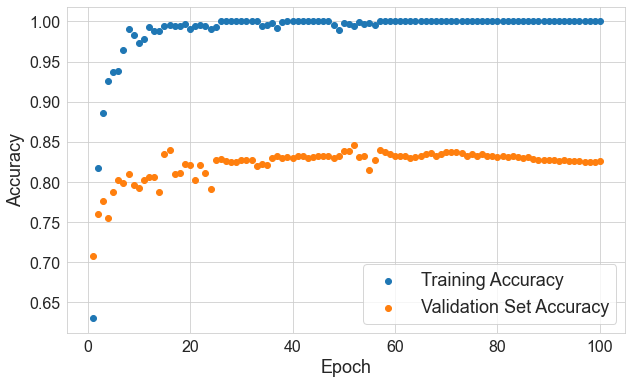

In [200]:
set_style("whitegrid")

plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,101), history_dict['val_accuracy'], label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

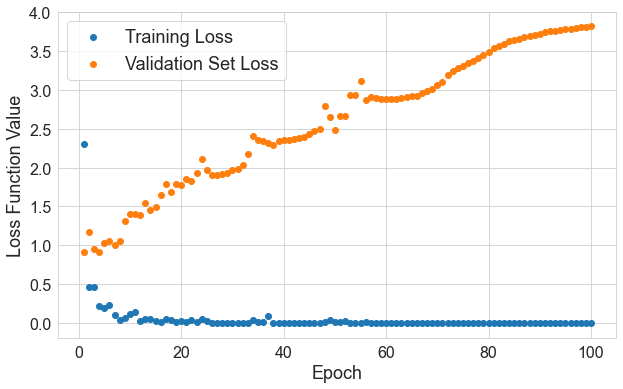

In [201]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,101), history_dict['val_loss'], label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss Function Value", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

In [202]:
fpr,tpr,thresholds=roc_curve(y_test,model.predict(X_test)[:,1])

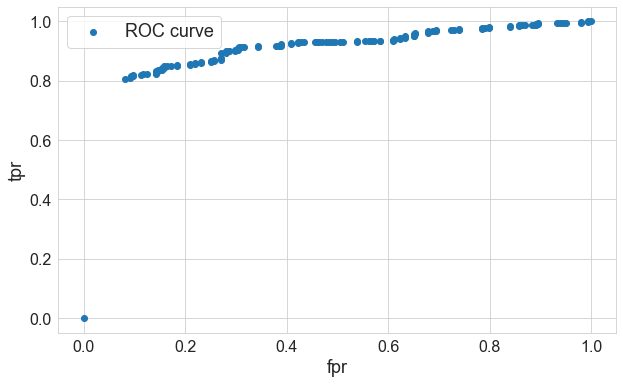

In [203]:
plt.figure(figsize = (10,6))

plt.scatter(fpr, tpr ,label = "ROC curve")

plt.xlabel("fpr", fontsize=18)
plt.ylabel("tpr", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

# DNN for fft data

In [204]:
model_fft = models.Sequential()
model_fft.add(layers.Dense(256, activation='relu', input_shape=(7500,)))
model_fft.add(layers.Dense(256, activation='relu'))
model_fft.add(layers.Dense(256, activation='relu'))
model_fft.add(layers.Dense(2, activation='softmax'))
model_fft.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 256)               1920256   
_________________________________________________________________
dense_85 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_86 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_87 (Dense)             (None, 2)                 514       
Total params: 2,052,354
Trainable params: 2,052,354
Non-trainable params: 0
_________________________________________________________________


In [205]:
# we compile the network like so
model_fft.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [206]:
## I now fit the model, and store the training history
## I use 100 epochs and a batch_size of 512
history_fft = model_fft.fit(X_fft_train,
                        to_categorical(y_fft_train),
                        epochs = 100,
                        batch_size = 400,
                        validation_data=(X_fft_test,to_categorical(y_fft_test)))
history_fft_dict = history_fft.history

Epoch 1/100
5/5 [==============================] - 1s 186ms/step - loss: 668.8413 - accuracy: 0.5319 - val_loss: 44.0859 - val_accuracy: 0.5014
Epoch 2/100
5/5 [==============================] - 1s 123ms/step - loss: 270.2084 - accuracy: 0.5108 - val_loss: 569.3049 - val_accuracy: 0.5100
Epoch 3/100
5/5 [==============================] - 1s 131ms/step - loss: 365.4353 - accuracy: 0.5163 - val_loss: 60.2744 - val_accuracy: 0.5100
Epoch 4/100
5/5 [==============================] - 1s 123ms/step - loss: 82.9828 - accuracy: 0.5218 - val_loss: 25.7717 - val_accuracy: 0.5514
Epoch 5/100
5/5 [==============================] - 1s 131ms/step - loss: 93.3083 - accuracy: 0.5303 - val_loss: 233.1957 - val_accuracy: 0.5100
Epoch 6/100
5/5 [==============================] - 0s 106ms/step - loss: 177.3547 - accuracy: 0.5145 - val_loss: 175.4946 - val_accuracy: 0.4900
Epoch 7/100
5/5 [==============================] - 1s 117ms/step - loss: 125.8578 - accuracy: 0.5587 - val_loss: 36.0824 - val_accuracy

# Naive Bayes Gaussian

In [208]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train);
y_pred_gnb = model_gnb.predict(X_test)
print( accuracy_score(y_test,y_pred_gnb))
print( precision_score(y_test,y_pred_gnb))
print( recall_score(y_test,y_pred_gnb))

0.6757142857142857
0.7663934426229508
0.5238095238095238


In [209]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_fft_train, y_fft_train);
y_fft_pred_gnb = model_gnb.predict(X_fft_test)
print( accuracy_score(y_fft_test,y_fft_pred_gnb))
print( precision_score(y_fft_test,y_fft_pred_gnb))
print( recall_score(y_fft_test,y_fft_pred_gnb))

0.6485714285714286
0.8135593220338984
0.40336134453781514


# Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train,y_train)
y_pred_log_reg = log_reg.predict(X_test)
print( accuracy_score(y_test,y_pred_log_reg))
print( precision_score(y_test,y_pred_log_reg))
print( recall_score(y_test,y_pred_log_reg))

0.7685714285714286
0.7545691906005222
0.8095238095238095


In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_fft_train[:,:],y_fft_train)
y_fft_pred_log_reg = log_reg.predict(X_fft_test[:,:])
print( accuracy_score(y_fft_test,y_fft_pred_log_reg))
print( precision_score(y_fft_test,y_fft_pred_log_reg))
print( recall_score(y_fft_test,y_fft_pred_log_reg))

0.8614285714285714
0.8282828282828283
0.9187675070028011
